#**STOCK PRICE ANALYSIS OF UNIQLO**

---
## 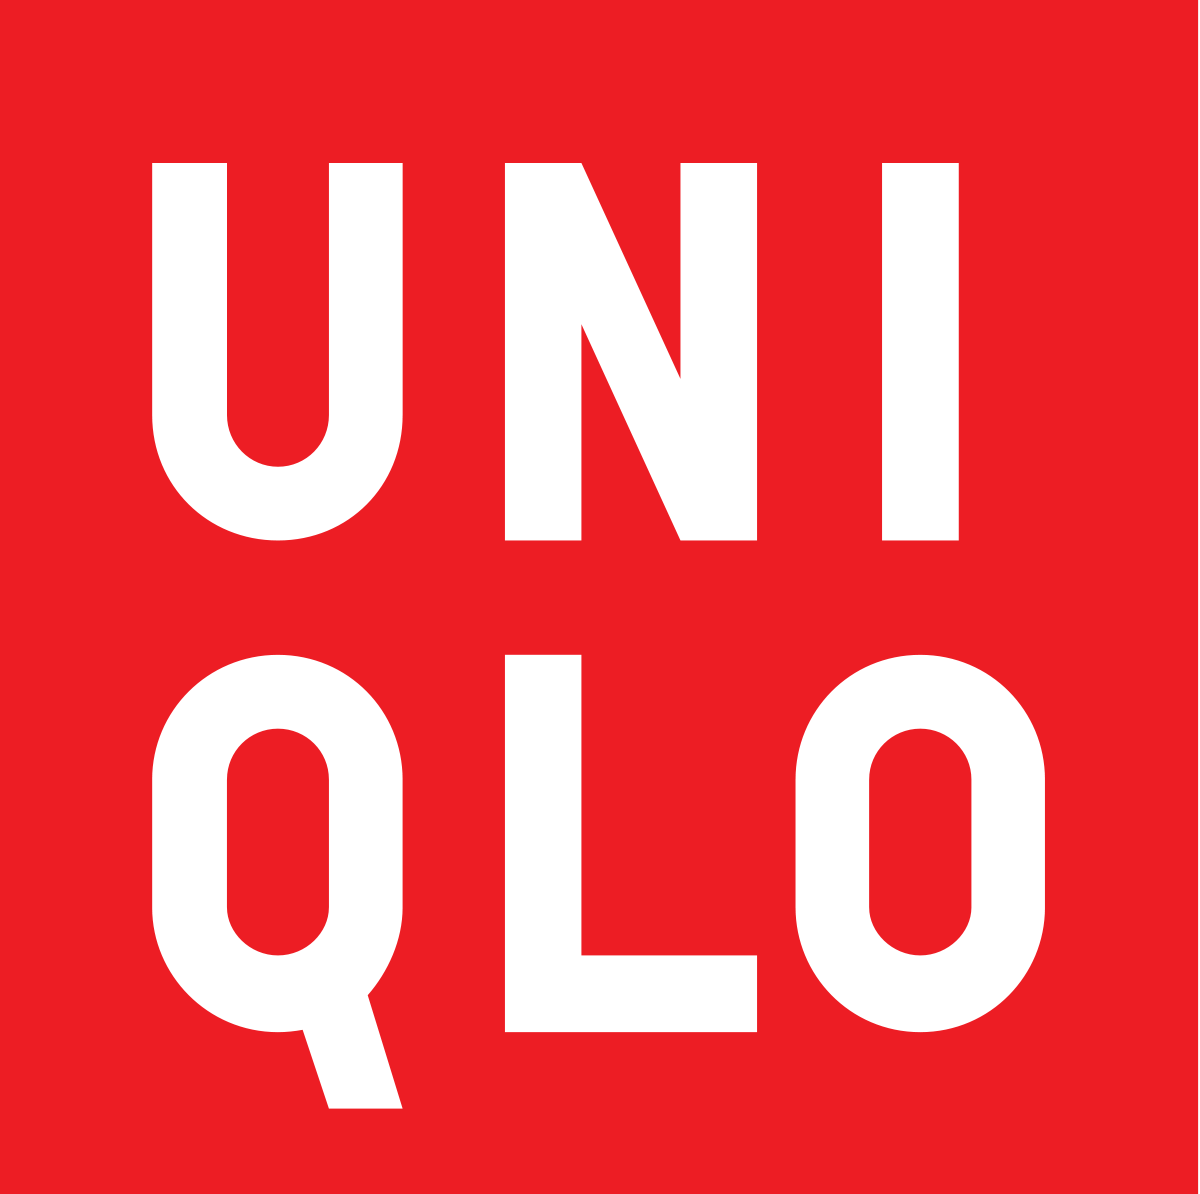




# Importing Libraries

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"geetika001","key":"2c170baa427f36aff10848a0e8f6b53b"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy kaggle.json file to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list dataset in kaggle
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                        Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          12545        369  1.0              
zusmani/petrolgas-prices-worldwide                              Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33           1143         71  1.0              
devansodariya/student-performance-data                          Student Performance Dataset                           7KB  2022-05-26 13:55:09           7258        209  0.9705882        
ruchi798/data-science-job-salaries                          

# Downloading Dataset

In [ ]:
! kaggle datasets download -d daiearth22/uniqlo-fastretailing-stock-price-prediction

  0% 0.00/24.7k [00:00<?, ?B/s]
100% 24.7k/24.7k [00:00<00:00, 22.4MB/s]


In [ ]:
! unzip /content/uniqlo-fastretailing-stock-price-prediction.zip

Archive:  /content/uniqlo-fastretailing-stock-price-prediction.zip
  inflating: Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv  
  inflating: Uniqlo(FastRetailing) 2017 Test - stocks2017.csv  


In [ ]:
data1=pd.read_csv("/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")

In [ ]:
data2=pd.read_csv("/content/Uniqlo(FastRetailing) 2017 Test - stocks2017.csv")

In [ ]:
type(data1)

pandas.core.frame.DataFrame

In [ ]:
type(data2)

pandas.core.frame.DataFrame

In [ ]:
data1.head(-5)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
...,...,...,...,...,...,...,...
1216,2012-01-18,14780,15000,14740,14980,650300,9677803000
1217,2012-01-17,14640,14820,14630,14750,442100,6511265000
1218,2012-01-16,14610,14670,14530,14610,360100,5255652000
1219,2012-01-13,14740,14780,14450,14770,1543700,22669096000


In [ ]:
data2.head(7)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2017-01-13,38900,39380,38240,38430,1321200,51197289000
1,2017-01-12,38300,38450,37930,38010,800900,30540359000
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000
5,2017-01-05,43250,43330,42470,42590,516800,22124250000
6,2017-01-04,42480,43330,42450,43290,648100,27916728000


In [ ]:
data1.shape

(1226, 7)

In [ ]:
data2.shape

(7, 7)

In [ ]:
data1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Stock Trading'], dtype='object')

In [ ]:
data2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Stock Trading'], dtype='object')

# Questions

**Q1.Plot data for all periods to the low value of the stock and study this graph in relation to change in the open value.**

2012-2016:

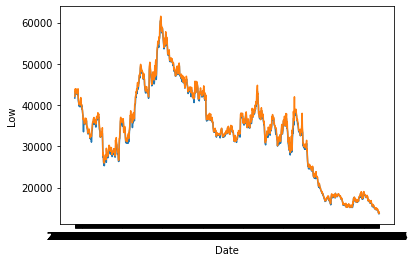

In [ ]:
sns.lineplot(x="Date",y="Low",data=data1)
sns.lineplot(x="Date",y="Open",data=data1)



 2017:

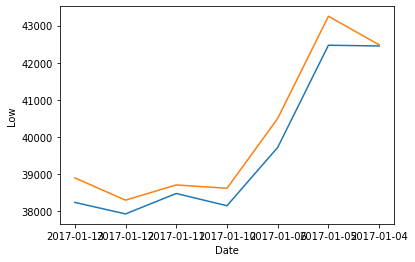

In [ ]:
sns.lineplot(x="Date",y="Low",data=data2)
sns.lineplot(x="Date",y="Open",data=data2)




*   Open Value=Orange
*   Low Value=Blue


In both the graphs for time period before and after 2016,Open value follows the low value except for the higher value than that of "low" at some places.

**Q2.Analyse the price change within a day using standard deviation.**

Standard Deviation:
A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean.
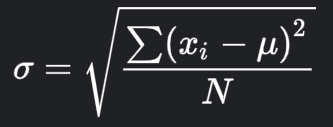

2012-2016:

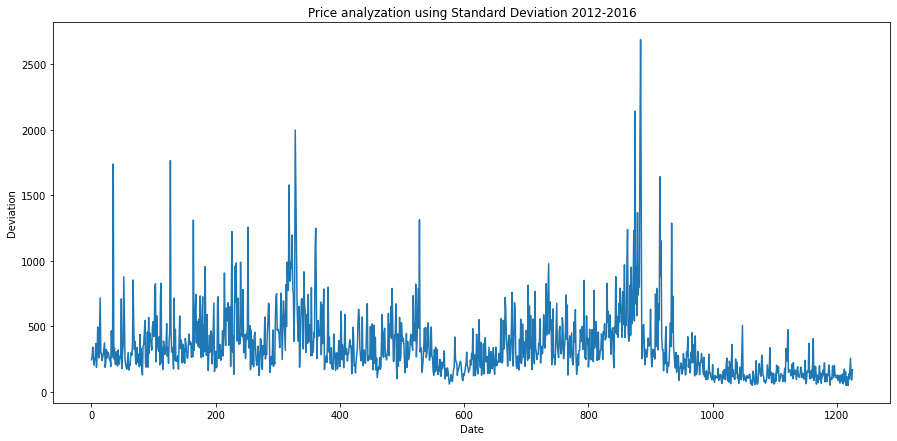

In [ ]:
from numpy.ma.core import std
mean = (data1['High'] + data1['Low'] + data1['Open'] + data1['Close'])/4
m1 = (data1['High'] - mean)*(data1['High']-mean)
m2 = (data1['Low'] - mean)*(data1['Low']-mean)
m3 = (data1['Open'] - mean)*(data1['Open']-mean)
m4 = (data1['Close'] - mean)*(data1['Close']-mean)

m = (m1 + m2 + m3 + m4)/4

std = m**0.5

std.plot(figsize=(15,7))
plt.xlabel("Date")
plt.ylabel("Deviation")
plt.title("Price analyzation using Standard Deviation 2012-2016")
plt.show()

In [ ]:
max = std.max()
min = std.min()

print("Maximum Standard Deviation : ", max)
print("Minimum Standard Deviation : ", min)

Maximum Standard Deviation :  555.0844530339505
Minimum Standard Deviation :  152.7047805407545


2017:

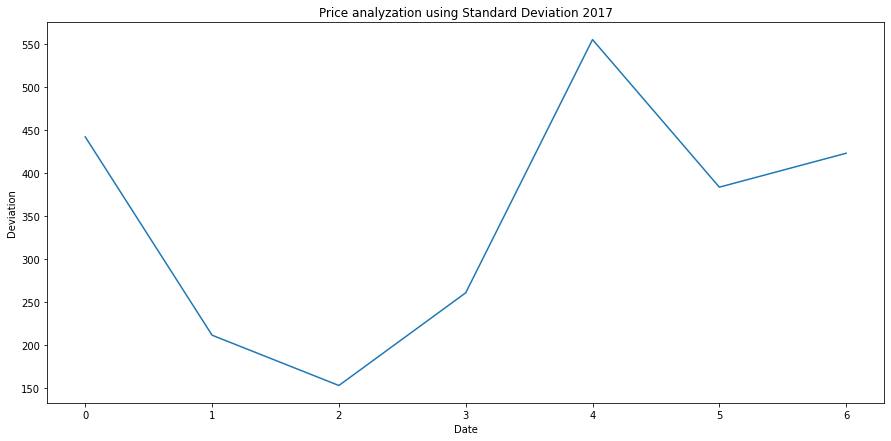

In [ ]:
from numpy.ma.core import std
mean = (data2['High'] + data2['Low'] + data2['Open'] + data2['Close'])/4
m1 = (data2['High'] - mean)*(data2['High']-mean)
m2 = (data2['Low'] - mean)*(data2['Low']-mean)
m3 = (data2['Open'] - mean)*(data2['Open']-mean)
m4 = (data2['Close'] - mean)*(data2['Close']-mean)

m = (m1 + m2 + m3 + m4)/4

std = m**0.5

std.plot(figsize=(15,7))
plt.xlabel("Date")
plt.ylabel("Deviation")
plt.title("Price analyzation using Standard Deviation 2017")
plt.show()

In [ ]:
max = std.max()
min = std.min()

print("Maximum Standard Deviation : ", max)
print("Minimum Standard Deviation : ", min)

Maximum Standard Deviation :  555.0844530339505
Minimum Standard Deviation :  152.7047805407545


Graphs show how much the prices have deviated within a day using high, low, open and close values.


**Q3.Use a suitable plot to show the change in median of open,high,low and close in each quartile per the volume.**

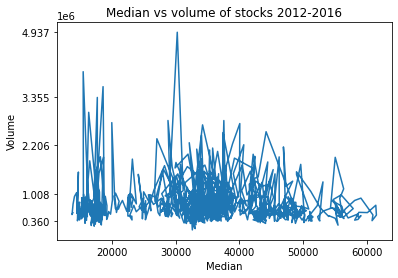

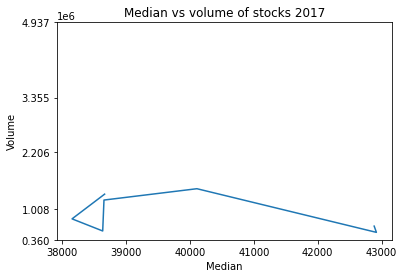

In [ ]:
#2012-2016
med = [data1['High'], data1['Low'], data1['Open'], data1['Close']]
df = pd.DataFrame(med)
plt.plot(df.median(), data1['Volume'])
plt.xlabel("Median")
plt.ylabel("Volume")
plt.title("Median vs volume of stocks 2012-2016")
plt.yticks([360100, 1007500, 2206300, 3354800, 4937300])
plt.show()

#2017
med = [data2['High'], data2['Low'], data2['Open'], data2['Close']]
df = pd.DataFrame(med)
plt.plot(df.median(), data2['Volume'])
plt.xlabel("Median")
plt.ylabel("Volume")
plt.title("Median vs volume of stocks 2017")
plt.yticks([360100, 1007500, 2206300, 3354800, 4937300])
plt.show()






*   Median of High, Low, Close, Open of each day is calculated using median()
*  Any particular trend is not observed between the median and volume of stocks













**Q4.Given that the difference between high and low is below the average and that of open and close is below the average,find the mean volume and compare it to the original value.**

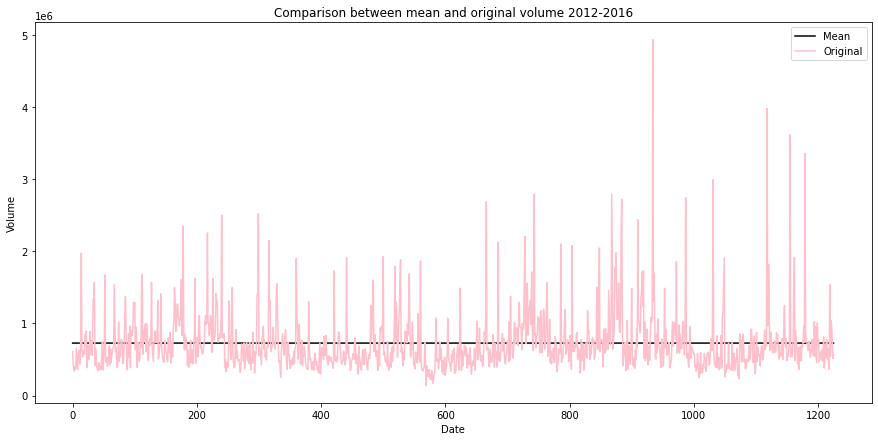

In [ ]:
#2012-2016
mean = (data1['Volume'].sum()/data1['Date'].count() + data1['Volume'] - data1['Volume'])
mean.plot(figsize=(15,7), label='Mean',color='black')
data1['Volume'].plot(label='Original', figsize=(15,7), color='pink')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Comparison between mean and original volume 2012-2016")

plt.legend()
plt.show()




In [ ]:
print(mean)
print("Minimum Volume 2012-2016 : ",data1['Volume'].min())
print("Maximum Volume 2012-2016 : ",data1['Volume'].max())

0       727555.628059
1       727555.628059
2       727555.628059
3       727555.628059
4       727555.628059
            ...      
1221    727555.628059
1222    727555.628059
1223    727555.628059
1224    727555.628059
1225    727555.628059
Name: Volume, Length: 1226, dtype: float64
Minimum Volume 2012-2016 :  139100
Maximum Volume 2012-2016 :  4937300


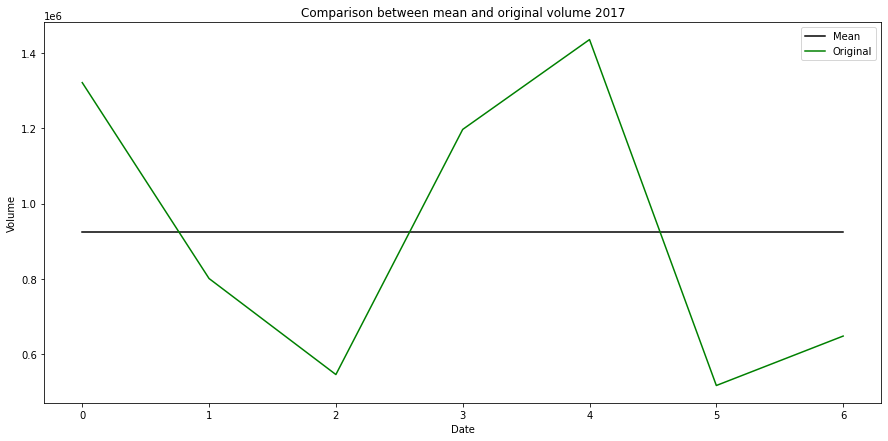

In [ ]:
#2017
mean = (data2['Volume'].sum()/data2['Date'].count() + data2['Volume'] - data2['Volume'])
mean.plot(figsize=(15,7), label='Mean',color='black')
data2['Volume'].plot(label='Original', figsize=(15,7), color='green')
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Comparison between mean and original volume 2017")

plt.legend()
plt.show()

In [ ]:
print(mean)

print("Minimum Volume 2017 : ",data2['Volume'].min())
print("Maximum Volume 2017 : ",data2['Volume'].max())

0    923614.285714
1    923614.285714
2    923614.285714
3    923614.285714
4    923614.285714
5    923614.285714
6    923614.285714
Name: Volume, dtype: float64
Minimum Volume 2017 :  516800
Maximum Volume 2017 :  1435500




*   Mean Volume for 2012-2016 = 727555.628059
*   Mean Volume for 2017 = 923614.285714


*   Most of the volume is concentrated near the mean.






**Q5.Use a suitable plot to study the changes in stock trading with respect to time,also plot the changes of difference between open and close to study the fluctuations and relationship between the two.**

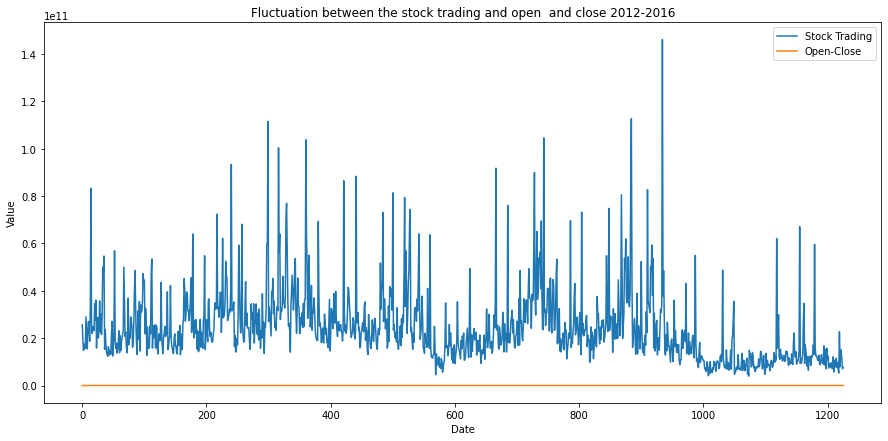

In [ ]:
data1['Stock Trading'].plot(label='Stock Trading', figsize=(15,7))
(data1['Open'] - data1['Close']).plot(label='Open-Close', figsize=(15,7))
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Fluctuation between the stock trading and open  and close 2012-2016")
plt.legend()
plt.show()

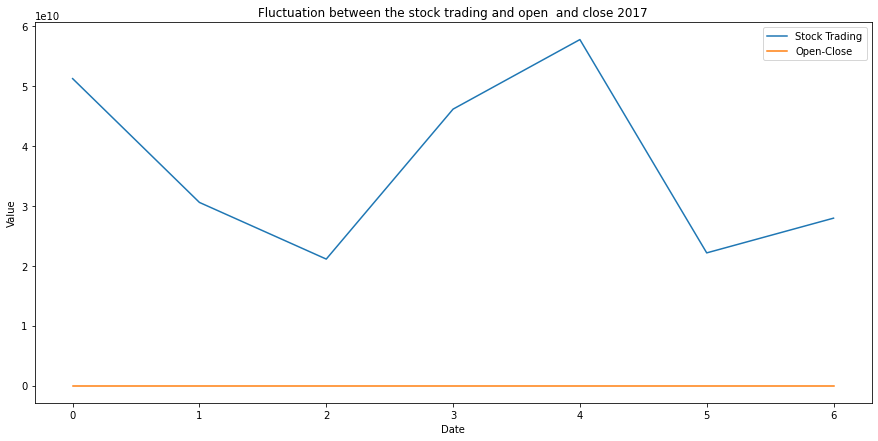

In [ ]:
data2['Stock Trading'].plot(label='Stock Trading', figsize=(15,7))
(data2['Open'] - data2['Close']).plot(label='Open-Close', figsize=(15,7))
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Fluctuation between the stock trading and open  and close 2017")
plt.legend()
plt.show()



*   Any particular pattern is not observed between the value of stock trading and difference between Open an Close values that varies over the years

*  The Straight line(Orange line in plot) shows that the Open and Close remains constant 






**Q6.Find the percentage change in median for the stock trading if the difference between high and low is below the average and that of open and close is above the average.**

2012-2016

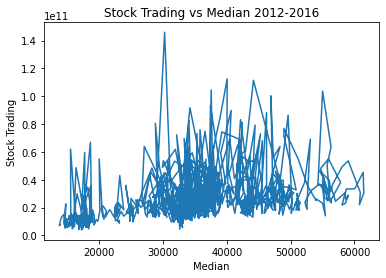

In [ ]:
#2012-2016
med = [data1['High'], data1['Low'], data1['Open'], data1['Close']]
df=pd.DataFrame(med)
plt.plot(df.median(), data1['Stock Trading'])
plt.xlabel("Median")
plt.ylabel("Stock Trading")
plt.title("Stock Trading vs Median 2012-2016")
plt.show()



In [ ]:
df.median()

0       41975.0
1       42830.0
2       43605.0
3       43380.0
4       43325.0
         ...   
1221    14475.0
1222    14140.0
1223    13920.0
1224    13760.0
1225    13885.0
Length: 1226, dtype: float64

In [ ]:
 a = df.median()
 dfm = pd.DataFrame(a)
 print(dfm.min())
 print(dfm.max())

0    13760.0
dtype: float64
0    61460.0
dtype: float64




*   Maximum Median = 61460.0
*  Minimum Median = 13760.0





*   Percentage Change = ((max median - min median)/min median)*100
*   Percentage Change = ((61460 - 13760)/13760)*100


*   Percentage Change = 346.66 %







2017

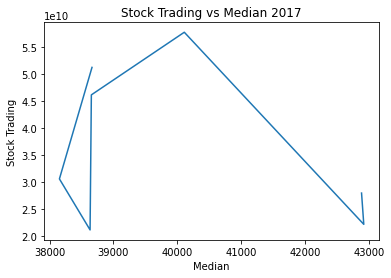

In [ ]:
#2017
med = [data2['High'], data2['Low'], data2['Open'], data2['Close']]
df=pd.DataFrame(med)
plt.plot(df.median(), data2['Stock Trading'])
plt.xlabel("Median")
plt.ylabel("Stock Trading")
plt.title("Stock Trading vs Median 2017")
plt.show()



In [ ]:
df.median()

0    38665.0
1    38155.0
2    38635.0
3    38655.0
4    40110.0
5    42920.0
6    42885.0
dtype: float64

In [ ]:
a = df.median()
dfm = pd.DataFrame(a)
print(dfm.min())
print(dfm.max())

0    38155.0
dtype: float64
0    42920.0
dtype: float64




*   Maximum Median = 42920.0
*  Minimum Median = 38155.0





*   Percentage Change = ((max median - min median)/min median)*100
*   Percentage Change = ((42920 - 38155.0)/38155.0)*100


*   Percentage Change =  12.49%





